# Week 14: an overview of Neural Networks and Deep Learning

## Brief Recap:

* Hello, how are you?
* Today: An overview of Neural Nets and Deep Learning
* Next Class: I will listen to you!: Presentation time
* After presentations I will spend the second half talking about the homeworks

## Artificial Neural Networks & Deep Learning

**Artificial Neural Networks** - a collection of interconnected nodes called artificial neurons that follow simple rules to mimic the behavior of biological neurons  

**Deep Neural Network** - an artificial neural network with multiple layers. a network with only one hidden layer is often called 'shallow'  

**Deep Learning** - a type of machine learning with artificial neural networks arranged in multiple (deep) 'hidden' layers

<img src="https://i.stack.imgur.com/OH3gI.png" width="60%" style="margin-left:auto; margin-right:auto">  



## a stroll through the history of Neural Nets



<img src="http://beamlab.org/images/deep_learning_101/nn_timeline.jpg" width="100%" style="margin-left:auto; margin-right:auto">  

image cred: [beam lab](http://beamlab.org/index.html)

## The Logical Calculus of Neural Activity

Developed by McCulloch & Pitts (1943)

***

* **"all-or-none"** law $\therefore$ any neuron may be represented as a proposition
* **proposition** - a declarative statement (either `True` or `False`)
* **propositional calculus** constructing arguments from propositions by using logical connectives

McCulloch & Pitts viewed neurons as propositional units and their physical connection with axons analogous to logical connections that can be used to buils arguments

### The Theory: Nets Without Circles

1. neural activity is "all-or-none"
2. a certain number of synapses within a certain time period must excite a neuron for it to respond
3. the only significant delay is synaptic delay
4. activity of inhibitory synapses prevents a neuron from being active
5. the structure of the net does not change

### McCulloch & Pitts Neuron

<img src="https://forum.huawei.com/enterprise/en/data/attachment/forum/202005/24/200534rcs8ro8hh4dwv26d.png?ann.png" width="100%" style="margin-left:auto; margin-right:auto">

### McCulloch & Pitts Components

* directed weighted paths (positive or negative)
* Transfer function (sum the inputs)
* Activation function (Binary: fire/don't fire) applied over the net input
    * achieve a non-linearity
    * $f(x) = \left\{ \begin{array}{rcl}
1 & \mbox{If}
& x \geq \Theta \\ 0 & \mbox{If} & x \lt \Theta
\end{array}\right.$
* Threshold ($\Theta$)

### Building Logic Gates with McCulloch & Pitts Neuron

combinations of these simple logic gates can be combined to perform some complex expressions

<img src="https://slideplayer.org/slide/890210/3/images/57/McCulloch-Pitts-Neuronen+zum+Aufbau+logischer+Funktionen.jpg" width="60%" style="margin-left:auto; margin-right:auto">

## The Perceptron

Developed by Frank Rensenblatt (1957)  

***

**Threshold Logic Unit (TLU)** a simple ANN architecture that build from McCulloch & Pitts  

* inputs and outputs are numbers (not binary on/off)
* each input has an associated weight
* computes a weighted sum of the inputs (transfer fxn)
    - $\sum_1^n (w_nx_n)$
    - $\mathbf{x}^T\mathbf{w}$
* applies a step function (activation fxn) 
    - heaviside $(z) = \left\{ \begin{array}{rcl}
0 & \mbox{If}
& z \lt 0 \\ 1 & \mbox{If} & z \geq 0
\end{array}\right.$

## Perceptron Architecture

* a layer of 'passthrough' input neurons (with a bias feature)
* a single, fully connected Perceptron layer
* output layer

<img src="https://data-science-blog.com/wp-content/uploads/2020/07/perceptron_1-1030x501.png" width="60%" style="margin-left:auto; margin-right:auto">

### A clearer Perceptron

<img src="https://www.researchgate.net/profile/Carlo-Sansone/publication/280696016/figure/fig6/AS:668447369343000@1536381680862/An-example-three-layer-Perceptron-This-architecture-may-be-used-to-make-a-binary.ppm" width="70%" style="margin-left:auto; margin-right:auto">


## Training Perceptrons

Hebbian Learning: Cells that fire together, wire together

***

Perceptron uses a learning rule similar to Hebbian learning.  
Connections are reinforced to help reduce error:

    for each training instance:
    make a prediction. ...activation_fxn(inputs*Weights+bias)
    for every output neuron that made a wrong prediction:
    strengthen the weights that would have produced the correct prediction

## Perceptron Performance

The sigmoid step function is similar to the logistic function.  
In turn, Perceptron has a linear decision boundary.  
Perceptron cannot learn complex patterns and can only perform on linearly separable data.  
However, it can find an optimal solution for linear separable data.

Let's look at a quick `sklearn` Perceptron example ...

In [14]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int64)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [15]:
# making predictions
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

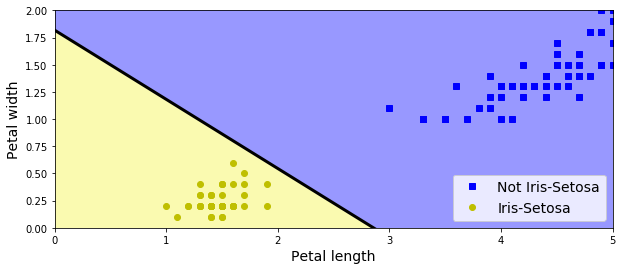

In [16]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

### Now you try....

Perceptron only converges for linearly separable data.  
How does the algorithm perform when you change the target class to one of the other classes?  

Here is a [Perceptron Demo](https://codepen.io/bagrounds/full/wdqypY)

## Adaline: Adaptive Linear Neurons

* **cost function** - find the error between the outcome and predicted labels
* **gradient descent** minimize the cost function

This builds on Perceptron by evaluating the decision boundary

<img src="https://rasbt.github.io/mlxtend/user_guide/classifier/Adaline_files/adaline_schematic.png" width="70%" style="margin-left:auto; margin-right:auto">

## The Dark Age

The XOR Problem

***

Exclusive OR - is True iff it's arguments differ

<img src="http://up9rade.com/img/nn006.png" width="70%" style="margin-left:auto; margin-right:auto">

## The Dark Age

The XOR Problem

***

<img src="https://i1.wp.com/mvslim.com/wp-content/uploads/2015/11/Untitled.png" width="70%" style="margin-left:auto; margin-right:auto">

## MultiLayer Perceptron

It turns out that some Perceptron limitations can be overcome by stacking multiple Perceptron hidden layers.  

* one or more layers of hidden TLUs
* every layer except the output has a bias neuron

<img src="https://lh3.googleusercontent.com/proxy/OLRbQhMWkzj2znPC8fSB6BrDLCVFt6-5QV-8Dnr5yUhR58oX2bWYVpBmOx5GvhJkU2n7TMSngDWWaHEviB3o55gmkf0xLCsSCWUESw" width="50%" style="margin-left:auto; margin-right:auto">

## Solving the XOR Problem

[a quick visualization](https://www.youtube.com/watch?v=OtqB1s7iLtA)

## Training MLPs

Putting the Learning in Deep Learning

***

MLPs are feed-forward.  
This presents a problem: how do we train a MLP?  

#### Why do we train an MLP?...
If we want the neural net to improve it's ability to, say, perform a classification, we need a way to:  

* show the model the error it is making
* update the weights such that it can improve

## Backpropagation

"Learning Representation by Back-Propagating Error" Rumelhart, Hinton & Williams (1986)

***

find out how much each connection weight should be adjusted in order to reduce the prediction error

* work by passing the network smaller batches processed as **epochs**.
* for each epoch:
    - complete a forward pass of the data to compute the outputs
    - measure the network error
    - compute how much each output connection contributes to the error (uses the chain rule)
    - work backwards through successive layers to contribute the errors on the connections until the error has been measured across the network
    - using the error, perform gradient descent to minimize the error

### Backprop Visualized

[what is backpropagation really doing](https://www.youtube.com/watch?v=Ilg3gGewQ5U)

## MLP Activation Function

Hinton *et al* replace the step function with something differentiable (so Gradient Descent can move)  

* Sigmoid (Logistic)
* Tanh
* ReLU

[play with a Neural Network](https://playground.tensorflow.org/)

[Hinton's TED talk](https://www.youtube.com/watch?v=zl99IZvW7rE)

## 🥺 The! Last! Lecture! 😢
<img src="https://content.techgig.com/photo/80071467/pros-and-cons-of-python-programming-language-that-every-learner-must-know.jpg?132269" width="100%" style="margin-left:auto; margin-right:auto">